In [101]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

transaction = pd.read_csv('data/transaction.csv')
transaction_offers = pd.read_csv('data/transaction_offers.csv')
complete_df = pd.read_csv('data/complete.csv')
transaction_with_labels = pd.read_csv('data/transaction_with_labels.csv')

In [5]:
complete_df.head()

,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,social,...,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete
0,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,408.0,1,510.0,10.0,0.0,102.0,102.0,66.0,1
1,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,414.0,0,0.0,0.0,6.0,-414.0,-408.0,576.0,0
2,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,414.0,1,486.0,10.0,6.0,72.0,78.0,90.0,1
3,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,438.0,0,0.0,0.0,30.0,-438.0,-408.0,576.0,0
4,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,0,0.0,1,522.0,10.0,-504.0,522.0,18.0,150.0,0


In [6]:
complete_df.head()

,offer,offer_type,difficulty,duration,duration_hr,reward,channels,web,email,social,...,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete
0,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,408.0,1,510.0,10.0,0.0,102.0,102.0,66.0,1
1,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,414.0,0,0.0,0.0,6.0,-414.0,-408.0,576.0,0
2,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,414.0,1,486.0,10.0,6.0,72.0,78.0,90.0,1
3,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,1,438.0,0,0.0,0.0,30.0,-438.0,-408.0,576.0,0
4,1,bogo,10,7,168,10,"['email', 'mobile', 'social']",0,1,1,...,0,0.0,1,522.0,10.0,-504.0,522.0,18.0,150.0,0


In [7]:
complete_df.shape

(49035, 31)

In [8]:
complete_df.drop_duplicates(inplace = True)

In [9]:
complete_df.shape

(49035, 31)

In [10]:
complete_df['offer_id'].value_counts()

3f207df678b143eea3cee63160fa8bed    6027
5a8bc65990b245e5a138643cd4eb9837    5640
0b1e1539f2cc45b7b9fa7c272da2e1d7    5184
fafdcd668e3743c1bb461111dcafc2a4    4848
2906b810c7d4411798c6938adc9daaa5    4683
2298d6c36e964ae4a3e7e9706d1fb8c2    4661
9b98b8c7a33c4b65b9aebfe6a799e6d9    4655
4d5c57ea9a6940dd891ad53e9dbe8da0    4481
ae264e3637204a6fb9bb56bc8210ddfd    4448
f19421c1d4aa40978ebb69ca19b0e20d    4408
Name: offer_id, dtype: int64

In [11]:
complete_df['offer_type'].value_counts()

discount         19376
bogo             17992
informational    11667
Name: offer_type, dtype: int64

In [12]:
complete_df['valid_complete'].value_counts()

0    29817
1    19218
Name: valid_complete, dtype: int64

In [13]:
transaction.shape

(123957, 10)

In [14]:
transaction.head()

,id,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent
0,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,144,32.28
2,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,528,23.22
3,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89
4,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,17.78


In [15]:
transaction.drop('id', axis = 1, inplace = True)

In [16]:
transaction['person'].value_counts()

8dbfa485249f409aa223a2130f40634a    36
79d9d4f86aca4bed9290350fb43817c2    36
94de646f7b6041228ca7dec82adb97d2    35
b1f4ece7d49342628a9ed77aee2cde58    32
5e60c6aa3b834e44b822ea43a3efea26    32
                                    ..
3157f795b27c49218a5869d850a62807     1
54a637c5dd8b429d82815e71d3f4ac26     1
6ac3a35e06d848e9b02ec09e74d1ff7b     1
0e7642435a514809ab74563c86245c61     1
41ebfd4601c44c69a53bb4359e2d3666     1
Name: person, Length: 14492, dtype: int64

In [17]:
complete_df['person'].value_counts()

73ceb3c59745462e9caa9cb2dec21925    6
269dce9ba8004504ae3a587a7df9db13    6
840cc4f0ccbb4ba7af0c511ec023ee85    6
e7b245f7399746faac8b4184d500a21a    6
828f238d7f554fff94d07de50faff45c    6
                                   ..
d17e1e62ec1d44239803e0aebe2c0949    1
7378619969094009af10e2097b4a5f76    1
e91dce4a4d0b454e80f5c90dc0eb55ee    1
96fa841c065d482bad03b19a7acfe95d    1
4d57a232827b47519527089f322ab1a2    1
Name: person, Length: 14764, dtype: int64

In [18]:
transaction_offers = pd.merge(
    transaction,
    complete_df,
    how = "inner",
    on = ["person", "age", "gender", "income", "became_member_on", "membership_duration"],
    indicator = True
)

In [19]:
transaction_offers.shape

(418321, 35)

In [20]:
transaction_offers.head()

,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent,offer,...,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete,_merge
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51,3,...,0.0,0,0.0,0.0,-504.0,0.0,-504.0,600.0,0,both
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51,4,...,0.0,1,528.0,5.0,-408.0,528.0,120.0,48.0,0,both
2,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,144,32.28,3,...,0.0,0,0.0,0.0,-504.0,0.0,-504.0,600.0,0,both
3,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,144,32.28,4,...,0.0,1,528.0,5.0,-408.0,528.0,120.0,48.0,0,both
4,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,528,23.22,3,...,0.0,0,0.0,0.0,-504.0,0.0,-504.0,600.0,0,both


In [22]:
transaction_offers.drop_duplicates(subset = 'id_o', keep = 'first', inplace = True)

In [23]:
transaction_offers.shape

(47959, 35)

In [24]:
complete_df.shape

(49035, 31)

In [25]:
transaction_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47959 entries, 0 to 418305
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      47959 non-null  int64   
 1   gender                   47959 non-null  object  
 2   income                   47959 non-null  float64 
 3   became_member_on         47959 non-null  object  
 4   membership_duration      47959 non-null  int64   
 5   person                   47959 non-null  object  
 6   event                    47959 non-null  object  
 7   time                     47959 non-null  int64   
 8   amount_spent             47959 non-null  float64 
 9   offer                    47959 non-null  int64   
 10  offer_type               47959 non-null  object  
 11  difficulty               47959 non-null  int64   
 12  duration                 47959 non-null  int64   
 13  duration_hr              47959 non-null  int64   
 14  rewar

In [27]:
transaction_offers.drop(['id_o', '_merge'], axis = 1, inplace = True)

In [28]:
transaction_offers['offer_type'].value_counts()

discount         18934
bogo             17602
informational    11423
Name: offer_type, dtype: int64

In [29]:
transaction_offers['valid_complete'].value_counts()

0    28741
1    19218
Name: valid_complete, dtype: int64

In [30]:
transaction_offers[transaction_offers.offer_type == 'informational'][['offer_id']].value_counts()

offer_id                        
3f207df678b143eea3cee63160fa8bed    5891
5a8bc65990b245e5a138643cd4eb9837    5532
dtype: int64

In [31]:
complete_df[complete_df.offer_type == 'informational']['offer_id'].value_counts()

3f207df678b143eea3cee63160fa8bed    6027
5a8bc65990b245e5a138643cd4eb9837    5640
Name: offer_id, dtype: int64

In [210]:
transaction_offers.columns

Index(['age', 'gender', 'income', 'became_member_on', 'membership_duration',
       'person', 'event', 'time', 'amount_spent', 'offer', 'offer_type',
       'difficulty', 'duration', 'duration_hr', 'reward', 'channels', 'web',
       'email', 'social', 'mobile', 'offer_received', 'time_received',
       'offer_id', 'offer_viewed', 'time_viewed', 'offer_completed',
       'time_completed', 'reward_received', 'received_viewed',
       'viewed_completed', 'received_completed_diff', 'duration_diff',
       'valid_complete', '_merge'],
      dtype='object')

In [32]:
transaction_offers.head()

,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent,offer,...,offer_viewed,time_viewed,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete
0,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51,3,...,0,0.0,0,0.0,0.0,-504.0,0.0,-504.0,600.0,0
1,55,F,112000.0,2017-07-15,376,0610b486422d4921ae7d2bf64640c50b,transaction,18,21.51,4,...,0,0.0,1,528.0,5.0,-408.0,528.0,120.0,48.0,0
6,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,1,...,1,408.0,1,510.0,10.0,0.0,102.0,102.0,66.0,1
7,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,4,...,1,6.0,1,132.0,5.0,6.0,126.0,132.0,36.0,1
8,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,8,...,1,216.0,0,0.0,0.0,48.0,-216.0,-168.0,240.0,0


In [212]:
# reward	channels	difficulty	duration	offer_type	id
# 1	10	[email, mobile, social]	10	7	bogo	ae264e3637204a6fb9bb56bc8210ddfd
# 2	10	[web, email, mobile, social]	10	5	bogo	4d5c57ea9a6940dd891ad53e9dbe8da0
# 3	0	[web, email, mobile]	0	4	informational	3f207df678b143eea3cee63160fa8bed
# 4	5	[web, email, mobile]	5	7	bogo	9b98b8c7a33c4b65b9aebfe6a799e6d9
# 5	5	[web, email]	20	10	discount	0b1e1539f2cc45b7b9fa7c272da2e1d7
# 6	3	[web, email, mobile, social]	7	7	discount	2298d6c36e964ae4a3e7e9706d1fb8c2
# 7	2	[web, email, mobile, social]	10	10	discount	fafdcd668e3743c1bb461111dcafc2a4
# 8	0	[email, mobile, social]	0	3	informational	5a8bc65990b245e5a138643cd4eb9837
# 9	5	[web, email, mobile, social]	5	5	bogo	f19421c1d4aa40978ebb69ca19b0e20d
# 10	2	[web, email, mobile]	10	7	discount	2906b810c7d4411798c6938adc9daaa5

> BOGO offers - Transaction time should be equal to the time the offer was completed.

In [33]:
time_anomaly = transaction_offers[(transaction_offers.offer_type == 'bogo') & (transaction_offers.offer_completed == 1) & (transaction_offers.time != transaction_offers.time_completed)].index
transaction_offers.drop(index = time_anomaly, inplace = True)

> Discount offers - Transaction time should be equal to the time the offer was completed.

In [34]:
more_time_anomaly = transaction_offers[(transaction_offers.offer_type == 'discount') & (transaction_offers.offer_completed == 1) & (transaction_offers.time != transaction_offers.time_completed)].index
transaction_offers.drop(index = more_time_anomaly, inplace = True)

> Informational offers - The transaction time should not be less than the time_received.

In [35]:
inconsistent = transaction_offers[(transaction_offers.offer_type == 'informational') & (transaction_offers.time < transaction_offers.time_received)].index
transaction_offers.drop(index = inconsistent, inplace = True)

In [36]:
transaction_offers.shape

(20936, 33)

In [37]:
transaction_offers['offer_type'].value_counts()

bogo             9354
discount         8378
informational    3204
Name: offer_type, dtype: int64

In [38]:
complete_df['offer_type'].value_counts()

discount         19376
bogo             17992
informational    11667
Name: offer_type, dtype: int64

In [39]:
# informational    69092
# discount         15787
# bogo             13160
# Name: offer_type, dtype: int64

In [56]:
transaction_offers[transaction_offers.offer_type == 'informational'][['person', 'offer', 'offer_id', 'time', 'duration', 'duration_hr', 'time_received', 'time_viewed',  'time_completed', 'amount_spent']]

,person,offer,offer_id,time,duration,duration_hr,time_received,time_viewed,time_completed,amount_spent
4,0610b486422d4921ae7d2bf64640c50b,3,3f207df678b143eea3cee63160fa8bed,528,4,96,504,0.0,0.0,23.22
14,78afa995795e4d85b5d9ceeca43f5fef,8,5a8bc65990b245e5a138643cd4eb9837,222,3,72,168,216.0,0.0,19.67
17,78afa995795e4d85b5d9ceeca43f5fef,8,5a8bc65990b245e5a138643cd4eb9837,240,3,72,168,216.0,0.0,29.72
20,78afa995795e4d85b5d9ceeca43f5fef,8,5a8bc65990b245e5a138643cd4eb9837,378,3,72,168,216.0,0.0,23.93
23,78afa995795e4d85b5d9ceeca43f5fef,8,5a8bc65990b245e5a138643cd4eb9837,510,3,72,168,216.0,0.0,21.72
...,...,...,...,...,...,...,...,...,...,...
520773,01d26f638c274aa0b965d24cefe3183f,8,5a8bc65990b245e5a138643cd4eb9837,672,3,72,336,396.0,0.0,4.16
520797,e4052622e5ba45a8b96b59aba68cf068,3,3f207df678b143eea3cee63160fa8bed,480,4,96,336,0.0,0.0,30.57
520800,e4052622e5ba45a8b96b59aba68cf068,3,3f207df678b143eea3cee63160fa8bed,486,4,96,336,0.0,0.0,19.47
520803,e4052622e5ba45a8b96b59aba68cf068,3,3f207df678b143eea3cee63160fa8bed,690,4,96,336,0.0,0.0,24.71


In [ ]:
# informational should only have offer # 3 and 8
# informational should have the same duration


In [79]:
# transaction_offers.to_csv('data/transaction_offers.csv', index = False)

In [80]:
transaction_offers.head()

,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent,offer,...,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete,completed,label
7,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,4,...,1,132.0,5.0,6.0,126.0,132.0,36.0,1,1.0,bogo buyers
37,65,M,53000.0,2018-02-09,167,389bc3fa690240e798340f5a15918d5c,transaction,60,9.54,9,...,1,60.0,5.0,0.0,60.0,60.0,60.0,1,1.0,bogo buyers
45,58,M,51000.0,2017-11-11,257,2eeac8d8feae4a8cad5a6af0499a211d,transaction,216,2.32,3,...,0,0.0,0.0,0.0,0.0,0.0,96.0,0,0.0,buy without offer
46,58,M,51000.0,2017-11-11,257,2eeac8d8feae4a8cad5a6af0499a211d,transaction,216,2.32,6,...,0,0.0,0.0,0.0,-168.0,-168.0,336.0,0,0.0,buy without offer
57,61,F,57000.0,2017-09-11,318,aa4862eba776480b8bb9c68455b8c2e1,transaction,210,12.33,2,...,1,210.0,10.0,0.0,42.0,42.0,78.0,1,1.0,bogo buyers


In [81]:
# Transactions with no offer

In [82]:
view_offer_before_receiving = transaction_offers[transaction_offers.time < transaction_offers.time_received]

In [83]:
view_offer_before_receiving['valid_complete'].value_counts()

0    10950
Name: valid_complete, dtype: int64

In [84]:
# Completed Transactions With BOGO

In [85]:
transaction_viewed_complete_bogo_offer = transaction_offers[(transaction_offers.offer_type == 'bogo') & (transaction_offers.time == transaction_offers.time_completed) & (transaction_offers.valid_complete == 1)]

In [86]:
transaction_viewed_complete_bogo_offer

,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent,offer,...,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete,completed,label
7,75,F,100000.0,2017-05-09,443,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,4,...,1,132.0,5.0,6.0,126.0,132.0,36.0,1,1.0,bogo buyers
37,65,M,53000.0,2018-02-09,167,389bc3fa690240e798340f5a15918d5c,transaction,60,9.54,9,...,1,60.0,5.0,0.0,60.0,60.0,60.0,1,1.0,bogo buyers
57,61,F,57000.0,2017-09-11,318,aa4862eba776480b8bb9c68455b8c2e1,transaction,210,12.33,2,...,1,210.0,10.0,0.0,42.0,42.0,78.0,1,1.0,bogo buyers
441,22,M,70000.0,2017-09-25,304,1e9420836d554513ab90eba98552d0a9,transaction,198,17.11,2,...,1,198.0,10.0,6.0,24.0,30.0,90.0,1,1.0,bogo buyers
528,69,F,57000.0,2016-08-14,711,102e9454054946fda62242d2e176fdce,transaction,6,19.88,2,...,1,6.0,10.0,0.0,6.0,6.0,114.0,1,1.0,bogo buyers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416816,51,M,79000.0,2018-02-08,168,d5d487cfdc5b456b84b7881ad5d3640b,transaction,0,17.50,9,...,1,0.0,5.0,54.0,-54.0,0.0,120.0,1,1.0,bogo buyers
416996,37,M,60000.0,2017-01-24,548,986d627671cc4bcf933079194b5f4f77,transaction,48,11.40,2,...,1,48.0,10.0,6.0,42.0,48.0,72.0,1,1.0,bogo buyers
417669,54,M,53000.0,2015-06-26,1126,cec1cdc6b77e41abbdce8903c5522e7e,transaction,84,19.70,9,...,1,84.0,5.0,30.0,54.0,84.0,36.0,1,1.0,bogo buyers
417852,39,F,54000.0,2016-09-21,673,122c0c2a3c2540848f8c3fdc37e97639,transaction,36,26.93,2,...,1,36.0,10.0,6.0,30.0,36.0,84.0,1,1.0,bogo buyers


In [87]:
# completed transactions with discount

In [88]:
transaction_viewed_complete_discount_offer = transaction_offers[(transaction_offers.offer_type == 'discount') & (transaction_offers.time == transaction_offers.time_completed) & (transaction_offers.valid_complete == 1)]

In [89]:
# completed transactions after viewing informational offer

In [90]:
transaction_from_informational = transaction_offers[(transaction_offers.offer_type == 'informational') & (transaction_offers.amount_spent > 0) & (transaction_offers.time >= transaction_offers.time_received) & (transaction_offers.offer_viewed == 1) ]

In [91]:
transaction_from_informational

,age,gender,income,became_member_on,membership_duration,person,event,time,amount_spent,offer,...,offer_completed,time_completed,reward_received,received_viewed,viewed_completed,received_completed_diff,duration_diff,valid_complete,completed,label
238,78,F,71000.0,2017-06-16,405,c27e0d6ab72c455a8bb66d980963de60,transaction,18,13.25,3,...,0,0.0,0.0,18.0,-18.0,0.0,96.0,0,1.0,informational buyers
423,53,O,52000.0,2017-09-16,313,d1ede868e29245ea91818a903fec04c6,transaction,24,1.72,8,...,0,0.0,0.0,0.0,0.0,0.0,72.0,0,1.0,informational buyers
825,54,F,80000.0,2017-02-07,534,57dd18ec5ddc46828afb81ec5977bef2,transaction,252,29.86,8,...,0,0.0,0.0,120.0,-288.0,-168.0,240.0,0,1.0,informational buyers
870,39,M,51000.0,2014-05-27,1521,be8a5d1981a2458d90b255ddc7e0d174,transaction,6,2.63,8,...,0,0.0,0.0,0.0,0.0,0.0,72.0,0,1.0,informational buyers
1404,75,M,52000.0,2015-11-29,970,a5a6ef2b78a04ddc9f374dd7c7f60bff,transaction,24,13.69,8,...,0,0.0,0.0,6.0,-6.0,0.0,72.0,0,1.0,informational buyers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417569,57,F,55000.0,2018-05-24,63,1fc56d7bf27d4d3888625d67fb2ea306,transaction,54,1.08,8,...,0,0.0,0.0,30.0,-30.0,0.0,72.0,0,1.0,informational buyers
417823,59,F,71000.0,2016-01-13,925,f88e91a11d8f405b9a47ad3741415b83,transaction,180,25.54,8,...,0,0.0,0.0,108.0,-108.0,0.0,72.0,0,1.0,informational buyers
417848,61,F,81000.0,2017-12-31,207,1b4df4b48bf64727a4c445909aea1251,transaction,414,19.88,3,...,0,0.0,0.0,0.0,0.0,0.0,96.0,0,1.0,informational buyers
417981,84,M,93000.0,2016-06-29,757,1966fa40d2f84620b2b1b9b64f8e0209,transaction,60,25.07,8,...,0,0.0,0.0,18.0,-18.0,0.0,72.0,0,1.0,informational buyers


In [262]:
# completed transactions without viewing the offer

In [92]:
transaction_without_view = transaction_offers[(transaction_offers.offer_type != 'informational') & (transaction_offers.valid_complete == 0) & (transaction_offers.offer_completed == 1) &(transaction_offers.time >= transaction_offers.time_received)]

In [93]:
transaction_offers.loc[(transaction_offers.offer_type == 'bogo') & (transaction_offers.time == transaction_offers.time_completed) & (transaction_offers.valid_complete == 1), 'completed'] = 1
transaction_offers.loc[(transaction_offers.offer_type == 'discount') & (transaction_offers.time == transaction_offers.time_completed) & (transaction_offers.valid_complete == 1), 'completed'] = 1
transaction_offers.loc[(transaction_offers.offer_type == 'informational') & (transaction_offers.amount_spent > 0) & (transaction_offers.time >= transaction_offers.time_received) & (transaction_offers.offer_viewed == 1), 'completed'] = 1

In [94]:
transaction_offers.loc[(transaction_offers.time < transaction_offers.time_received), 'label'] = 'buy without offer'
transaction_offers.loc[(transaction_offers.offer_type != 'informational') & (transaction_offers.offer_viewed == 0) & (transaction_offers.offer_completed == 1) & (transaction_offers.time >= transaction_offers.time_received), 'label'] = 'buy without offer'
transaction_offers.loc[(transaction_offers.offer_type != 'informational') & (transaction_offers.offer_viewed == 1) & (transaction_offers.offer_completed == 0)  & (transaction_offers.amount_spent > 0), 'label'] = 'buy without offer'
transaction_offers.loc[(transaction_offers.offer_type != 'informational') & (transaction_offers.offer_viewed == 0) & (transaction_offers.offer_completed == 0)  & (transaction_offers.amount_spent > 0), 'label'] = 'buy without offer'
transaction_offers.loc[(transaction_offers.offer_type == 'informational') & (transaction_offers.offer_viewed == 0) & (transaction_offers.amount_spent > 0), 'label'] = 'buy without offer'
transaction_offers.loc[(transaction_offers.offer_type == 'bogo') & (transaction_offers.time == transaction_offers.time_completed) & (transaction_offers.valid_complete == 1), 'label'] = 'bogo buyers'
transaction_offers.loc[(transaction_offers.offer_type == 'discount') & (transaction_offers.time == transaction_offers.time_completed) & (transaction_offers.valid_complete == 1), 'label'] = 'discount buyers'
transaction_offers.loc[(transaction_offers.offer_type == 'informational') & (transaction_offers.amount_spent > 0) & (transaction_offers.time >= transaction_offers.time_received) & (transaction_offers.offer_viewed == 1), 'label'] = 'informational buyers'

In [95]:
transaction_offers['completed'] = transaction_offers['completed'].fillna(0)

In [96]:
transaction_offers['offer_type'].value_counts()

bogo             9354
discount         8378
informational    3204
Name: offer_type, dtype: int64

In [97]:
transaction_offers[(transaction_offers.offer_viewed == 0) & (transaction_offers.completed == 1)][['offer_viewed', 'offer_completed', 'amount_spent', 'completed']]

,offer_viewed,offer_completed,amount_spent,completed


In [98]:
transaction_offers[['person', 'offer_type', 'offer_received', 'offer_viewed', 'offer_completed', 'time', 'time_viewed', 'time_received', 'time_completed', 'valid_complete', 'label', 'amount_spent', 'completed']]

,person,offer_type,offer_received,offer_viewed,offer_completed,time,time_viewed,time_received,time_completed,valid_complete,label,amount_spent,completed
7,78afa995795e4d85b5d9ceeca43f5fef,bogo,1,1,1,132,6.0,0,132.0,1,bogo buyers,19.89,1.0
37,389bc3fa690240e798340f5a15918d5c,bogo,1,1,1,60,0.0,0,60.0,1,bogo buyers,9.54,1.0
45,2eeac8d8feae4a8cad5a6af0499a211d,informational,1,0,0,216,0.0,0,0.0,0,buy without offer,2.32,0.0
46,2eeac8d8feae4a8cad5a6af0499a211d,discount,1,1,0,216,168.0,168,0.0,0,buy without offer,2.32,0.0
57,aa4862eba776480b8bb9c68455b8c2e1,bogo,1,1,1,210,168.0,168,210.0,1,bogo buyers,12.33,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418231,6d5f3a774f3d4714ab0c092238f3a1d7,bogo,1,1,0,60,402.0,336,0.0,0,buy without offer,3.92,0.0
418232,6d5f3a774f3d4714ab0c092238f3a1d7,discount,1,1,0,60,588.0,576,0.0,0,buy without offer,3.92,0.0
418254,2cb4f97358b841b9a9773a7aa05a9d77,informational,1,1,0,126,42.0,0,0.0,0,informational buyers,2.93,1.0
418273,01d26f638c274aa0b965d24cefe3183f,informational,1,0,0,204,0.0,168,0.0,0,buy without offer,3.30,0.0


In [99]:
transaction_offers[transaction_offers.label.isna()][['offer_type', 'offer_viewed', 'offer_completed', 'label', 'valid_complete', 'completed', 'amount_spent']]

,offer_type,offer_viewed,offer_completed,label,valid_complete,completed,amount_spent


In [100]:
# transaction_offers.to_csv('data/transaction_with_labels.csv', index = False)

Shows the outcome for the dataset where only the received and viewed offers are included.

Shows the outcomes for all sent offers

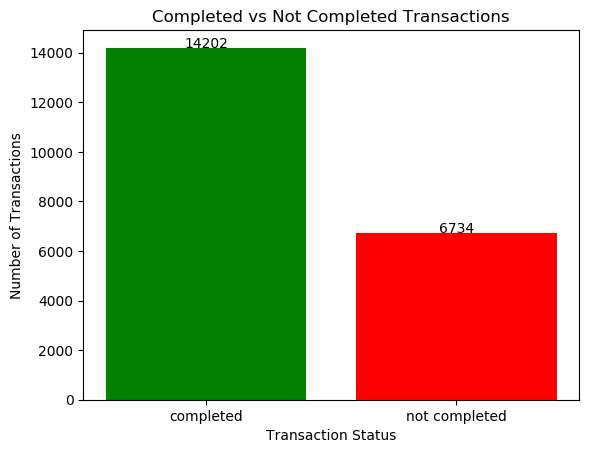

In [105]:
data = transaction_with_labels['completed'].value_counts()

df = pd.DataFrame({'status': ['completed', 'not completed'], 'count': [data[0.0], data[1.0]]})

fig, ax = plt.subplots()
ax.bar(df['status'], df['count'], color=['green', 'red'])

for i, count in enumerate(df['count']):
    ax.text(i, count + 5, str(count), ha='center')

ax.set_xlabel('Transaction Status')
ax.set_ylabel('Number of Transactions')
ax.set_title('Completed vs Not Completed Transactions')

# plt.show()

# plt.savefig(os.path.join('photos/outcomes.png'), dpi=300, format='png', bbox_inches='tight') 



# Which offer was the most successful in terms of the number of completed transactions.

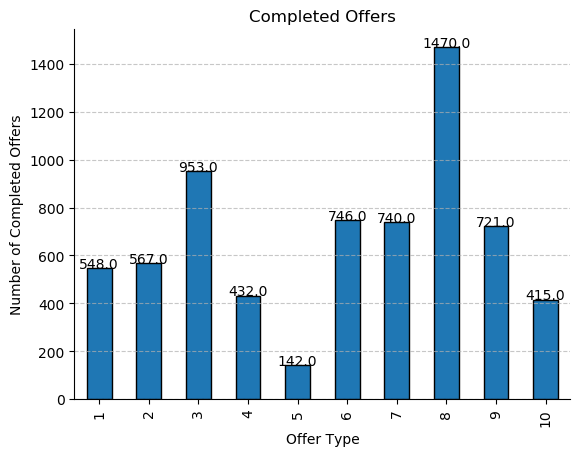

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# sample data
data = {'Offer': transaction_with_labels['offer'],
        'completed': transaction_with_labels['completed'],
        'Offer Type': transaction_with_labels['offer_type']
       }

# create a pandas DataFrame
df = pd.DataFrame(data)

# count the number of completed offers for each offer type
completed_counts = df.groupby('Offer')['completed'].sum()

ax = completed_counts.plot(kind='bar', edgecolor='black')

# add data labels to the bars
for i, v in enumerate(completed_counts.values):
    ax.text(i, v + 0.6, str(v), ha='center')

# adjust the chart layout and formatting
ax.set_xlabel('Offer Type')
ax.set_ylabel('Number of Completed Offers')
ax.set_title('Completed Offers')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

# plt.savefig(os.path.join('photos/completed_offers.png'), dpi=300, format='png', bbox_inches='tight') 


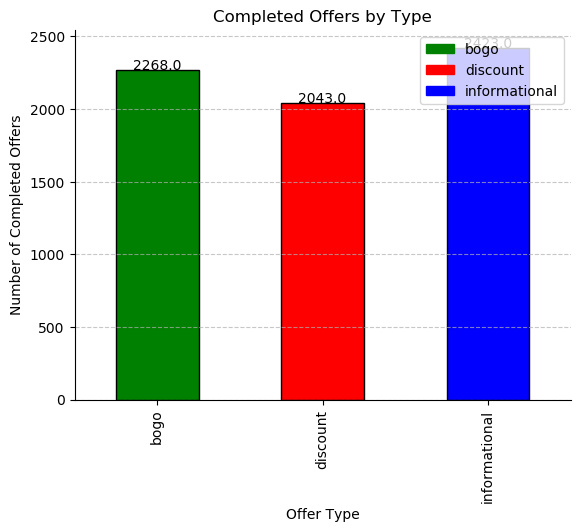

In [107]:
# create sample data
data = {'offer': transaction_with_labels['offer_id'],
        'offer_type': transaction_with_labels['offer_type'],
        'completed': transaction_with_labels['completed']}

# create a pandas DataFrame
df = pd.DataFrame(data)

# count the number of completed offers for each offer type
completed_counts = df.groupby('offer_type')['completed'].sum()

# set colors for each offer type
colors = {'discount': 'red', 'bogo': 'green', 'informational': 'blue'}

# plot the bar chart with different colors for each offer type
ax = completed_counts.plot(kind='bar', color=[colors[i] for i in completed_counts.index], edgecolor='black')

# add data labels to the bars
for i, v in enumerate(completed_counts.values):
    ax.text(i, v + 0.6, str(v), ha='center')

# add a legend that shows the colors of each offer type
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in completed_counts.index]
labels = completed_counts.index
plt.legend(handles, labels)

# adjust the chart layout and formatting
ax.set_xlabel('Offer Type')
ax.set_ylabel('Number of Completed Offers')
ax.set_title('Completed Offers by Type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

# plt.savefig(os.path.join('photos/completed_offers_by_type.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures



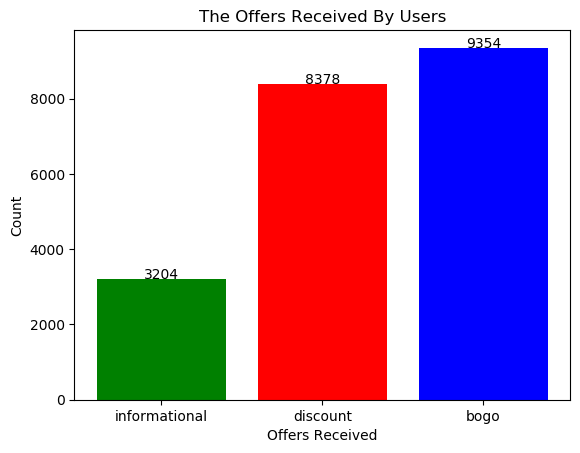

In [110]:
data = transaction_with_labels['offer_type'].value_counts()

df = pd.DataFrame({'status': ['informational', 'discount', 'bogo'], 'count': [data['informational'], data['discount'], data['bogo']]})

fig, ax = plt.subplots()
ax.bar(df['status'], df['count'], color=['green', 'red', 'blue'])

for i, count in enumerate(df['count']):
    ax.text(i, count + 5, str(count), ha='center')

ax.set_xlabel('Offers Received')
ax.set_ylabel('Count')
ax.set_title('The Offers Received By Users')

# plt.show()

# plt.savefig(os.path.join('photos/offers_received.png'), dpi=300, format='png', bbox_inches='tight') 

In [111]:
data = transaction_with_labels['offer_type'].value_counts()
data

bogo             9354
discount         8378
informational    3204
Name: offer_type, dtype: int64

In [112]:
data['informational']

3204

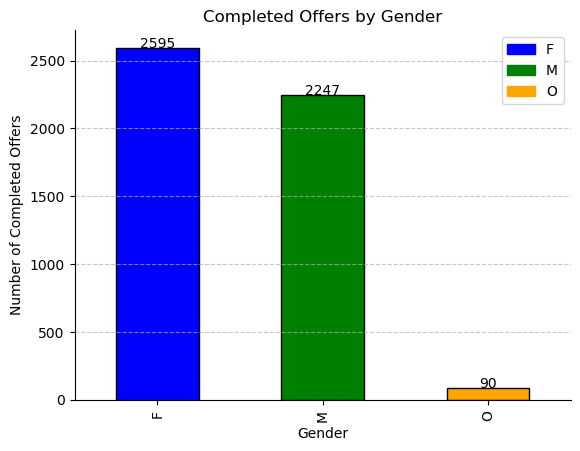

In [115]:
# create sample data
data = {'gender': transaction_with_labels['gender'],
        'completed': transaction_with_labels['offer_completed']}

# create a pandas DataFrame
df = pd.DataFrame(data)

# count the number of completed offers for each offer type
completed_counts = df.groupby('gender')['completed'].sum()

# set colors for each offer type
colors = {'M': 'green', 'F': 'blue', 'O': 'orange'}

# plot the bar chart with different colors for each offer type
ax = completed_counts.plot(kind='bar', color=[colors[i] for i in completed_counts.index], edgecolor='black')

# add data labels to the bars
for i, v in enumerate(completed_counts.values):
    ax.text(i, v + 0.6, str(v), ha='center')

# add a legend that shows the colors of each offer type
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in completed_counts.index]
labels = completed_counts.index
plt.legend(handles, labels)

# adjust the chart layout and formatting
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Completed Offers')
ax.set_title('Completed Offers by Gender')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

# plt.savefig(os.path.join('photos/completed_offers_by_gender.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures



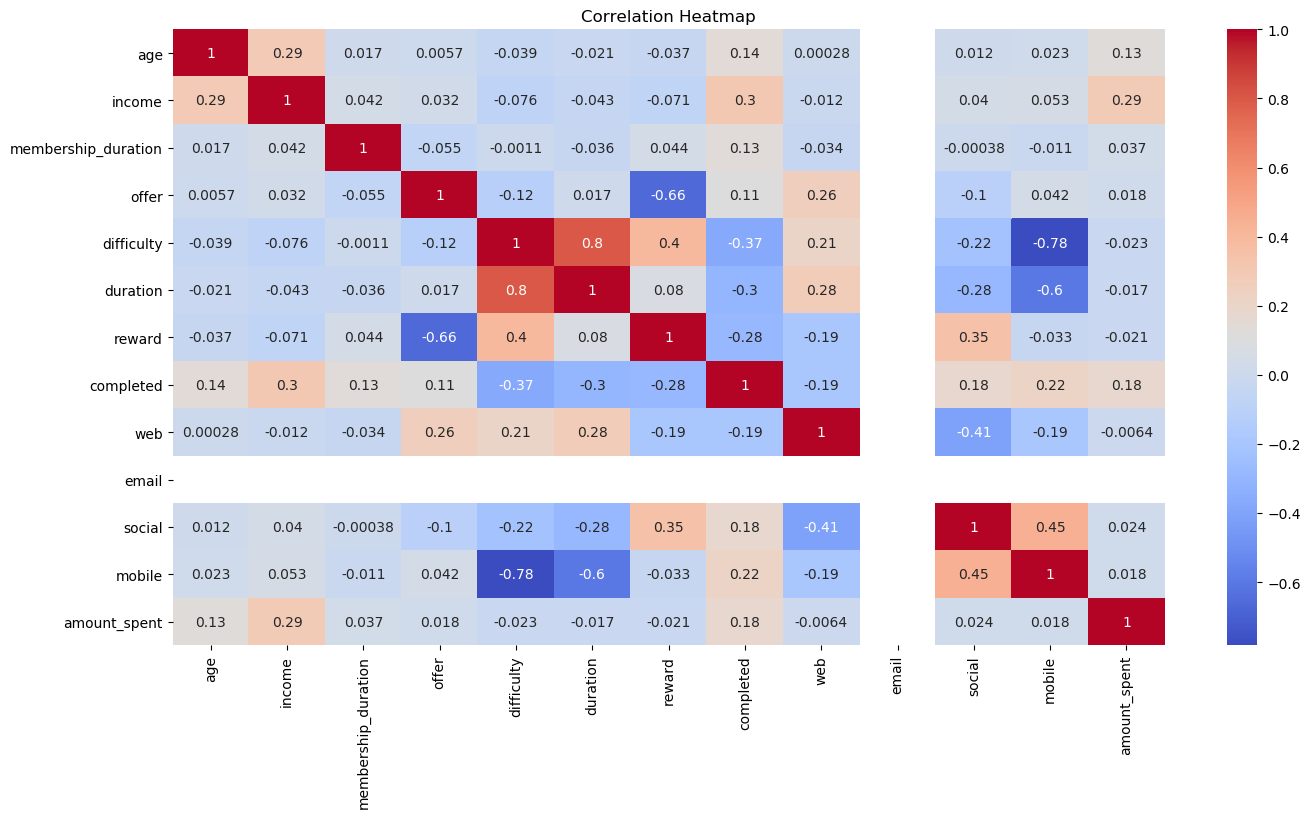

In [116]:
corr = transaction_with_labels[['age', 'income', 'membership_duration', 'offer', 'difficulty', 'duration', 'reward', 'completed', 'web', 'email', 'social', 'mobile', 'amount_spent']].corr()

fig, ax = plt.subplots(figsize=(16, 8))


sns.heatmap(corr, annot = True, cmap='coolwarm')


# for i in range(len(corr.columns)):
#     for j in range(i):
#         if abs(corr.iloc[i, j]) > threshold:
#             text = ax.text(j + 0.5, i + 0.5, "{:.2f}".format(corr.iloc[i, j]),
#                            ha="center", va="center", color="black", fontsize=10)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.title('Correlation Heatmap')
# plt.show()

# plt.savefig(os.path.join('photos/correlation_heat_map.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


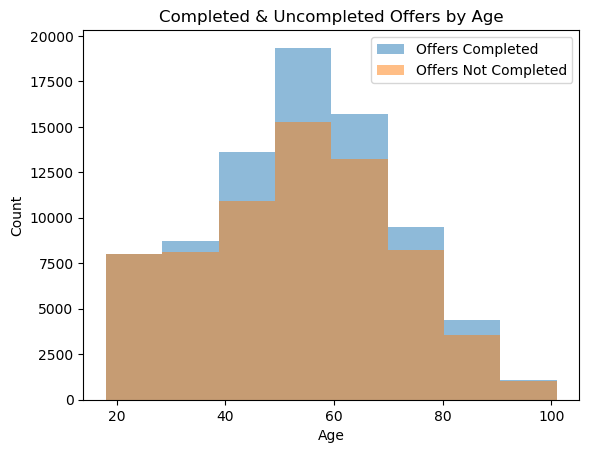

In [4]:
plt.hist(transaction_with_labels['age'][transaction_with_labels['completed'] == 1], bins=8, alpha=0.5, label='Offers Completed')
plt.hist(transaction_with_labels['age'][transaction_with_labels['completed'] == 0], bins=8, alpha=0.5, label='Offers Not Completed')
plt.legend(loc='upper right')

# add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Completed & Uncompleted Offers by Age')

plt.show()

# plt.savefig(os.path.join('photos/completed_age.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


In [5]:
transaction_with_labels['age'][transaction_with_labels['completed'] == 1].describe()

count    80326.000000
mean        53.819274
std         17.421058
min         18.000000
25%         41.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

In [6]:
transaction_with_labels['age'][transaction_with_labels['completed'] == 0].describe()

count    68347.000000
mean        53.172356
std         18.005742
min         18.000000
25%         40.000000
50%         54.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

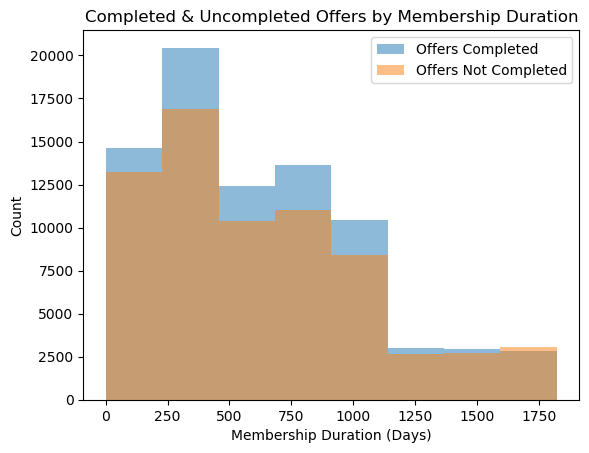

In [11]:
plt.hist(transaction_with_labels['membership_duration'][transaction_with_labels['completed'] == 1], bins=8, alpha=0.5, label='Offers Completed')
plt.hist(transaction_with_labels['membership_duration'][transaction_with_labels['completed'] == 0], bins=8, alpha=0.5, label='Offers Not Completed')
plt.legend(loc='upper right')

# add labels and title
plt.xlabel('Membership Duration (Days)')
plt.ylabel('Count')
plt.title('Completed & Uncompleted Offers by Membership Duration')

plt.show()

# plt.savefig(os.path.join('photos/completed_membership_duration.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


In [11]:
transaction_with_labels['membership_duration'][transaction_with_labels['completed'] == 1].describe()

count    80326.000000
mean       621.047818
std        423.335725
min          0.000000
25%        276.000000
50%        547.000000
75%        896.000000
max       1823.000000
Name: membership_duration, dtype: float64

In [12]:
transaction_with_labels['membership_duration'][transaction_with_labels['completed'] == 0].describe()

count    68347.000000
mean       627.822889
std        441.977875
min          0.000000
25%        272.000000
50%        546.000000
75%        906.000000
max       1823.000000
Name: membership_duration, dtype: float64

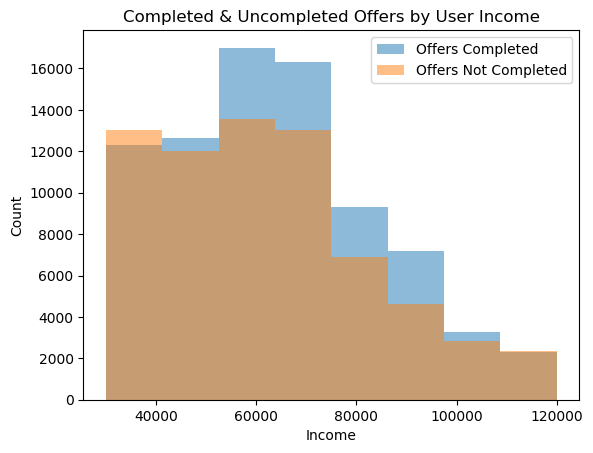

In [12]:
plt.hist(transaction_with_labels['income'][transaction_with_labels['completed'] == 1], bins=8, alpha=0.5, label='Offers Completed')
plt.hist(transaction_with_labels['income'][transaction_with_labels['completed'] == 0], bins=8, alpha=0.5, label='Offers Not Completed')
plt.legend(loc='upper right')

# add labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Completed & Uncompleted Offers by User Income')

plt.show()

# plt.savefig(os.path.join('photos/completed_income.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


In [7]:
transaction_with_labels['income'][transaction_with_labels['completed'] == 1].describe()

count     80326.000000
mean      64127.032343
std       20453.786816
min       30000.000000
25%       50000.000000
50%       62000.000000
75%       76000.000000
max      120000.000000
Name: income, dtype: float64

In [10]:
transaction_with_labels['income'][transaction_with_labels['completed'] == 0].describe()

count     68347.000000
mean      62290.678450
std       21144.166167
min       30000.000000
25%       46000.000000
50%       60000.000000
75%       74000.000000
max      120000.000000
Name: income, dtype: float64

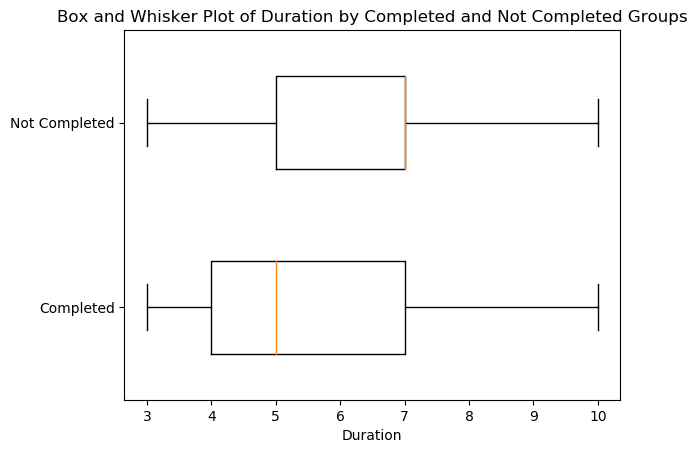

In [123]:
import matplotlib.pyplot as plt

# Sample data
completed = transaction_with_labels['duration'][transaction_with_labels['completed'] == 1]
not_completed = transaction_with_labels['duration'][transaction_with_labels['completed'] == 0]

# Create a figure and axis object
fig, ax = plt.subplots()

# Add the boxplot for completed group
ax.boxplot(completed, vert=False, positions=[0], widths=0.5)

# Add the boxplot for not completed group
ax.boxplot(not_completed, vert=False, positions=[1], widths=0.5)

# Set axis labels and title
ax.set_yticks([0, 1])
ax.set_yticklabels(['Completed', 'Not Completed'])
ax.set_xlabel('Duration')
ax.set_title('Box and Whisker Plot of Duration by Completed and Not Completed Groups')

# Show the plot
# plt.show()


plt.savefig(os.path.join('photos/completed_duration.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


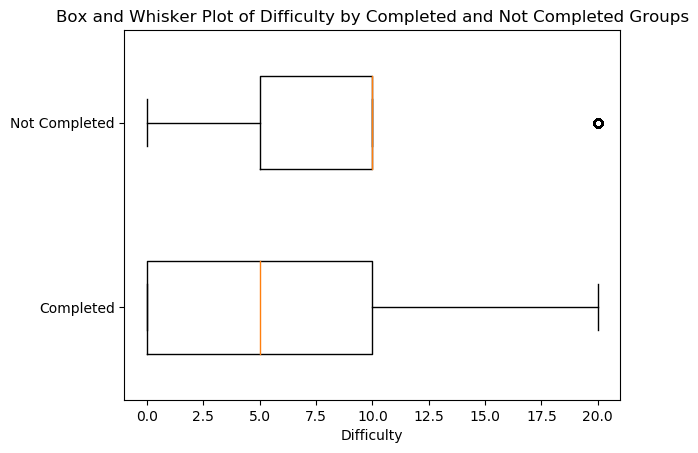

In [122]:
# Sample data
completed = transaction_with_labels['difficulty'][transaction_with_labels['completed'] == 1]
not_completed = transaction_with_labels['difficulty'][transaction_with_labels['completed'] == 0]

# Create a figure and axis object
fig, ax = plt.subplots()

# Add the boxplot for completed group
ax.boxplot(completed, vert=False, positions=[0], widths=0.5)

# Add the boxplot for not completed group
ax.boxplot(not_completed, vert=False, positions=[1], widths=0.5)

# Set axis labels and title
ax.set_yticks([0, 1])
ax.set_yticklabels(['Completed', 'Not Completed'])
ax.set_xlabel('Difficulty')
ax.set_title('Box and Whisker Plot of Difficulty by Completed and Not Completed Groups')

# Show the plot
plt.show()


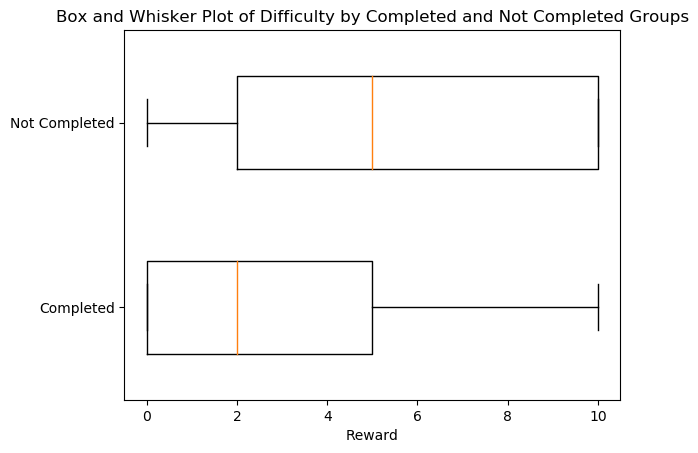

In [121]:
# Sample data
completed = transaction_with_labels['reward'][transaction_with_labels['completed'] == 1]
not_completed = transaction_with_labels['reward'][transaction_with_labels['completed'] == 0]

# Create a figure and axis object
fig, ax = plt.subplots()

# Add the boxplot for completed group
ax.boxplot(completed, vert=False, positions=[0], widths=0.5)

# Add the boxplot for not completed group
ax.boxplot(not_completed, vert=False, positions=[1], widths=0.5)

# Set axis labels and title
ax.set_yticks([0, 1])
ax.set_yticklabels(['Completed', 'Not Completed'])
ax.set_xlabel('Reward')
ax.set_title('Box and Whisker Plot of Difficulty by Completed and Not Completed Groups')

# Show the plot
plt.show()

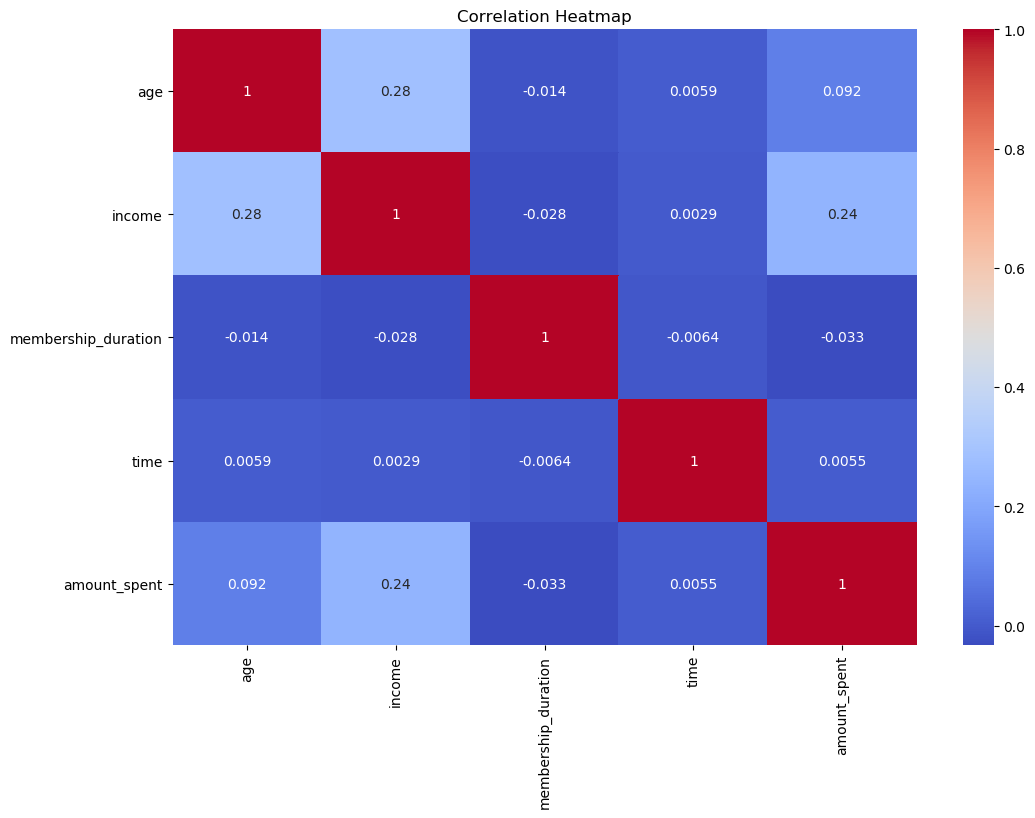

In [120]:
corr = transaction.corr()

fig, ax = plt.subplots(figsize=(12, 8))

threshold = 0.7

sns.heatmap(corr, cmap='coolwarm', annot = True)


for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            text = ax.text(j + 0.5, i + 0.5, "{:.2f}".format(corr.iloc[i, j]),
                           ha="center", va="center", color="black", fontsize=10)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.title('Correlation Heatmap')
# plt.show()

# plt.savefig(os.path.join('photos/correlation_heat_map.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


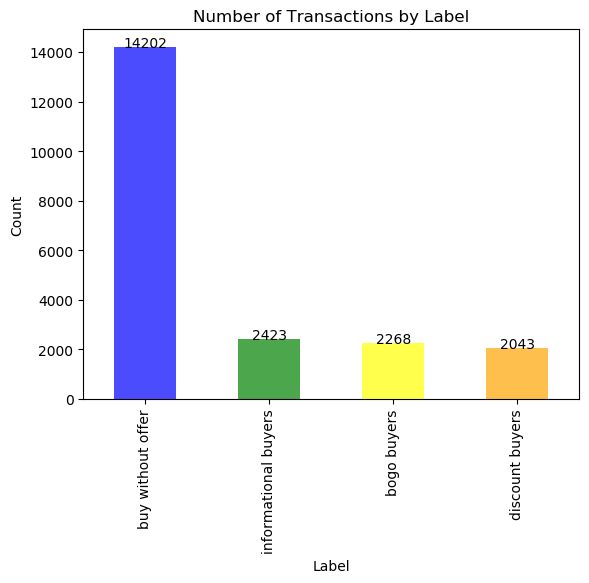

In [119]:
# Create a bar chart with different colors for each value
ax = transaction_with_labels.label.value_counts().plot(kind='bar', color=['blue', 'green', 'yellow', 'orange'], alpha=0.7)

# Add annotations to the bars
for i, v in enumerate(transaction_with_labels.label.value_counts()):
    ax.annotate(str(v), xy=(i, v + 0.2), ha='center')

# Add a title and axis labels
ax.set_title('Number of Transactions by Label')
ax.set_xlabel('Label')
ax.set_ylabel('Count')

# Show the plot
# plt.show()

# plt.savefig(os.path.join('photos/user_type.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


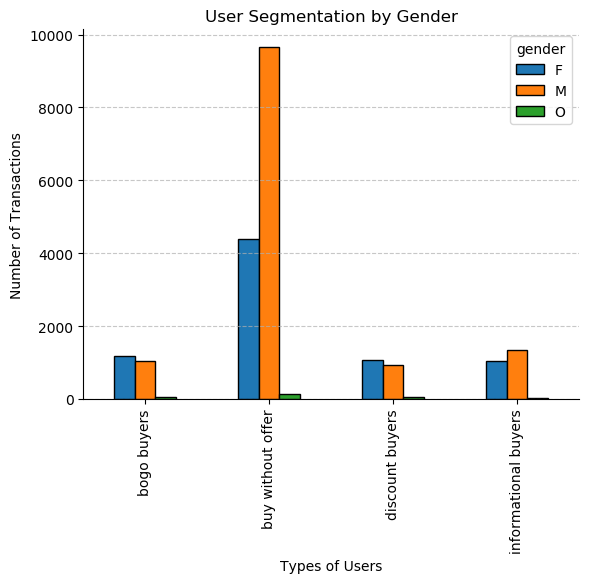

In [118]:
# create a crosstab table of counts by user type and gender
user_gender_counts = pd.crosstab(transaction_with_labels['label'], transaction_with_labels['gender'])

# plot the bar chart with different colors for each gender
ax = user_gender_counts.plot(kind='bar', stacked=False, edgecolor='black')

# adjust the chart layout and formatting
ax.set_xlabel('Types of Users')
ax.set_ylabel('Number of Transactions')
ax.set_title('User Segmentation by Gender')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

# plt.savefig(os.path.join('photos/user_by_gender.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures



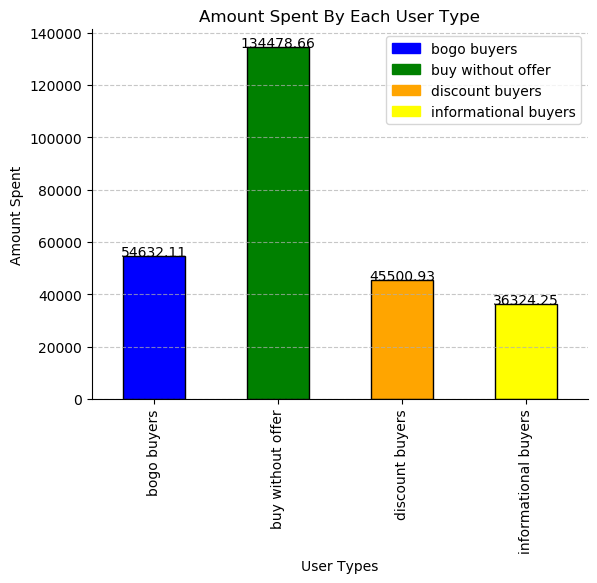

In [117]:
# create sample data
data = {'user type': transaction_with_labels['label'],
        'amount': transaction_with_labels['amount_spent']}

# create a pandas DataFrame
df = pd.DataFrame(data)

# count the number of completed offers for each offer type
amt_sum = df.groupby('user type')['amount'].sum()

# set colors for each offer type
colors = {'buy without offer': 'green', 'bogo buyers': 'blue', 'discount buyers': 'orange', 'informational buyers': 'yellow'}

# plot the bar chart with different colors for each offer type
ax = amt_sum.plot(kind='bar', color=[colors[i] for i in amt_sum.index], edgecolor='black')

# add data labels to the bars
for i, v in enumerate(amt_sum.values):
    ax.text(i, v + 0.6, str(v), ha='center')

# add a legend that shows the colors of each offer type
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in amt_sum.index]
labels = amt_sum.index
plt.legend(handles, labels)

# adjust the chart layout and formatting
ax.set_xlabel('User Types')
ax.set_ylabel('Amount Spent')
ax.set_title('Amount Spent By Each User Type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

# plt.savefig(os.path.join('photos/amount_spent.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
